<a href="https://colab.research.google.com/github/IvlevaAnna1/Hometasks/blob/main/DL2_homework_AnnaIvleva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# task2.4. Реализовать на базе модели определения пола выявление с другим нормированием (относительно среднего значения). Также добавьте альтернативную функцию активации
# task2.5. Реализовать решение уровнения через градиентный спуск: x**2+2x-6
# task2.6. Запустить DL2 CNN

In [ ]:
# task2.4. Реализовать на базе модели определения пола выявление с другим нормированием (относительно среднего значения). Также добавьте альтернативную функцию активации

In [12]:
import numpy as np

def tanh(x):
  # Sigmoid activation function: f(x) = (2 / (1 + np.exp(-2 * x)))-1
  return (2 / (1 + np.exp(-2 * x)))-1

def deriv_tanh(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = tanh(x)
  # return fx * (1 - fx)
  return 1 - fx**2

# def mae_loss(y_true, y_pred):
#   # y_true and y_pred are numpy arrays of the same length.
#   return ((y_true - y_pred) ** 2).mean()
  # return (abs(y_true - y_pred) ).mean()

def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = tanh(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = tanh(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = tanh(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.01
    epochs = 100 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = tanh(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = tanh(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = tanh(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_tanh(sum_o1)
        d_ypred_d_w6 = h2 * deriv_tanh(sum_o1)
        d_ypred_d_b3 = deriv_tanh(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_tanh(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_tanh(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_tanh(sum_h1)
        d_h1_d_w2 = x[1] * deriv_tanh(sum_h1)
        d_h1_d_b1 = deriv_tanh(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_tanh(sum_h2)
        d_h2_d_w4 = x[1] * deriv_tanh(sum_h2)
        d_h2_d_b2 = deriv_tanh(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Epoch 0 loss: 0.258
Epoch 10 loss: 0.102
Epoch 20 loss: 0.039
Epoch 30 loss: 0.024
Epoch 40 loss: 0.018
Epoch 50 loss: 0.015
Epoch 60 loss: 0.013
Epoch 70 loss: 0.011
Epoch 80 loss: 0.010
Epoch 90 loss: 0.008
Emily: 0.887
Frank: -0.007


In [26]:
# task2.02: найти минимум для x**2+2x-6

# Функция градиента
def dJ(x):
    return 2 * x + 2

 # Функция потерь
def J(x):
    return (x ** 2 + 2 * x - 6)

x = 0.0
 # Записываем точку каждого падения градиента
history_x=[x]
i_iter=0.1
 # Скорость обучения
learn_rate = 0.01
 # Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.1
    dj = dJ(x)
    last_x = x
    x =x - learn_rate * dj
    history_x.append(x)

         # Если итерация достигнута точно, расчет завершен
    if abs(J(x)-J(last_x))<0.0000000001 :
        break

history_y = J(np.array(history_x))
print(f'Координата x в минимуме параболы равна {round(x, 1)}')

Координата x в минимуме параболы равна -1.0


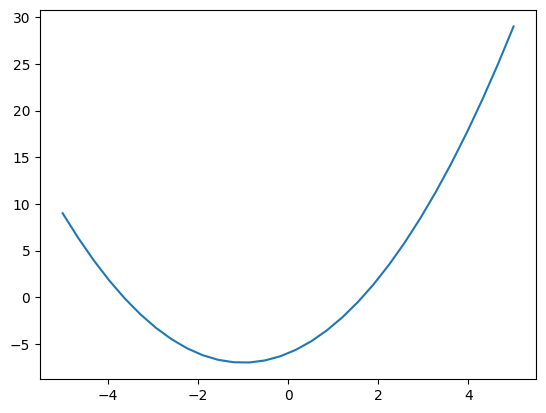

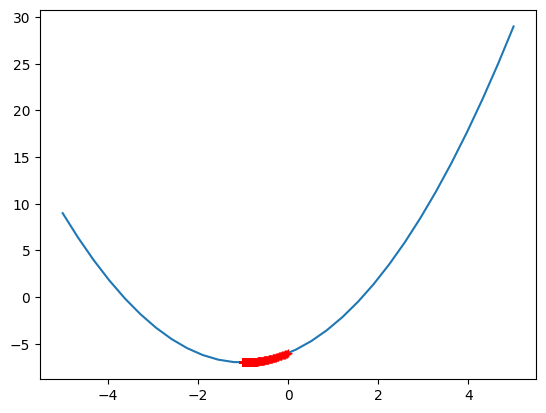

In [29]:
import matplotlib.pyplot as plt
# y = x ** 2 + 2 * x - 6
# Создаем арифметическую последовательность plot_x1
plot_x1 = np.linspace(-5, 5, 30)
# Рассчитываем plot_y1 согласно нашему уравнению
plot_y1 = (plot_x1 ** 2 + 2 * plot_x1 - 6)
# Возьмем соответствующее положение plot_x1 plot_y1 как координаты x, y точки, затем нарисуем кривую квадратного уравнения
plt.plot(plot_x1, plot_y1)
plt.show()
plt.plot(plot_x1, plot_y1)
plt.plot(history_x, history_y,color='r', marker='+');